### Assignment 02

Start by importing all required libraries.

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Question 01

We start by importing the required image in grayscale.

In [21]:
im = cv2.imread('the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_REDUCED_COLOR_4)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

We will look for blobs using a Laplacian of Gaussian (LoG) kernel.

A 2D (continuous) Gaussian with zero-mean and variance $\sigma^2$ is given by
$$
G(x, y) = \dfrac{1}{2\pi\sigma^2} \exp\left(-\dfrac{x^2+y^2}{2\sigma^2}\right),
$$
and its Laplacian is given by
$$
L(x, y) = \nabla^2 \, G(x, y) = \left[ \dfrac{x^2 + y^2 - 2\sigma^2}{2\pi\sigma^6}\right] \exp\left(-\dfrac{x^2+y^2}{2\sigma^2}\right).
$$

We now implement the LoG kernel.

In [22]:
def LoG(sigma, k):
    '''
        Generate a k x k Laplacian of Gaussian kernel with standard deviation sigma.

        k is expected to be odd.
    '''
    
    k = (k - 1) // 2

    X, Y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))

    R2 = X**2 + Y**2

    log = ((R2 - 2*sigma**2) / (2*np.pi*sigma**6)) * np.exp(-R2 / (2*sigma**2))

    return log

Consider a (continuous) image of a perfect circle of radius $R$, given by
$$
I(x, y) =
\begin{cases}
1, & x^2 + y^2 < R^2, \\
0, & \text{otherwise}.
\end{cases}
$$

It is easy to see (due to radial symmetry) that the response of the LoG kernel to such an image is
$$
2\pi \int_0^R L(x, 0) \, dx,
$$
and that this response is maximum when 
$$
\dfrac{\text{d}}{\text{d}R} \int_0^R L(x, 0) \, dx = L(R, 0) = 0,
$$
which occurs precisely when
$$
R=\sigma\sqrt{2}.
$$

Hence, the kernel's maximum response for a circle occurs when it has radius $\sigma\sqrt{2}$; and so we conclude that a LoG kernel with parameter $\sigma$ acts to detect blobs of "radius" $\sigma\sqrt{2}$.

Below, we implement the code to run a LoG kernel over an image with some specified $\sigma$.

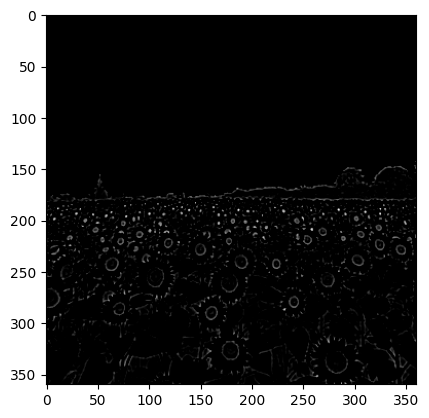

In [ ]:
def detect_blobs(im, sigma, size, thresh):
    '''
    docstring
    '''
    
    log = LoG(sigma, size) # Obtain the kernel

    response = cv2.filter2D(im, -1, log) # Convolve with the image to obtain the response

    plt.imshow(response, cmap='gray')

detect_blobs(im, 1, 6*1, 0.03)